<a href="https://colab.research.google.com/github/brunabrits/BrunaBritoSantiago/blob/main/Dados_BrunaBrito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Com base no arquivo: https://www.kaggle.com/datasets/raziehghahartars/ecommerce

Foi desenvolvido os gráficos para responder as perguntas a seguir:

01) Quais os produtos mais vendidos considerando os últimos 3 anos?

02) Qual o produto mais caro e o mais barato?

03) Qual a categoria de produto mais vendida e menos vendida? Qual a categoria mais e menos cara

04)Qual produto com melhor e pior NPS?

05) Analisando a base de dados qual tipo de público (considerando gênero e idade ) e o canal ideal para vender determinado tipo de produto?

Observação: Adotei a premissa de que tudo que se refere a produto se trata na verdade de *categoria de produto*, já que na base não existem os produto em si.

In [1]:
import pandas as panda
import matplotlib.pyplot as plt

O arquivo "Ecommerce_DBS LIMPA.xlsx" precisa estar na pasta de arquivos para que seja lido.

In [9]:
files = '/content/Ecommerce_DBS LIMPA.xlsx'
df = panda.read_excel(files)

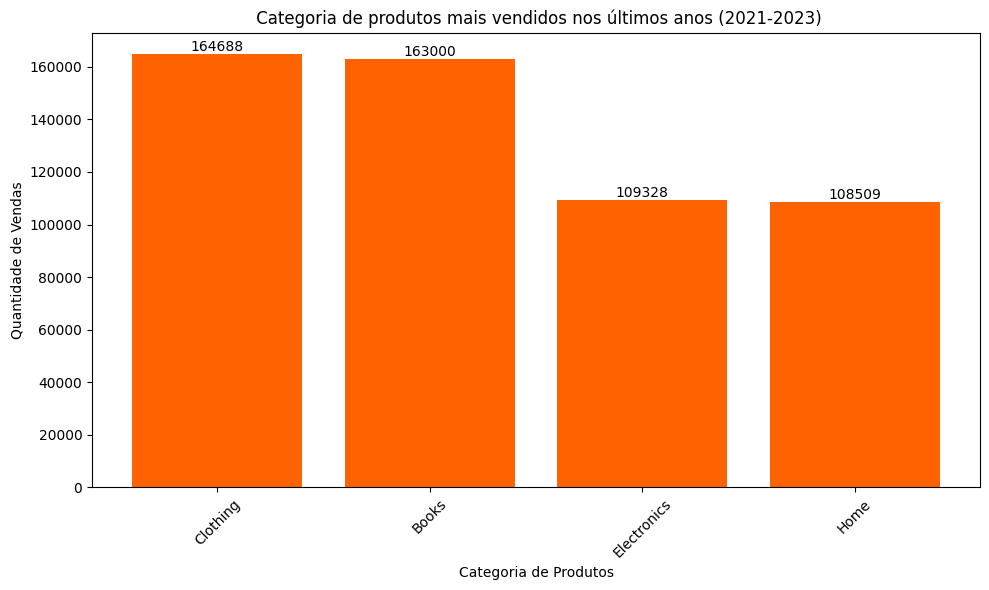

In [4]:
def formatar_quantidade(valor):
    return f'{int(valor)}'

data_inicial = '01/01/2021'
data_final = '31/12/2023'
mask = (df.iloc[:, 1] >= data_inicial) & (df.iloc[:, 1] <= data_final)
filtrando_df = df.loc[mask]

categoriaEqtd = filtrando_df.groupby(df.columns[2])[df.columns[4]].sum().reset_index()

ordenando_df = categoriaEqtd.sort_values(by=df.columns[4], ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(ordenando_df[df.columns[2]], ordenando_df[df.columns[4]], color='#FF6200')
plt.xlabel('Categoria de Produtos')
plt.ylabel('Quantidade de Vendas')
plt.title(' Categoria de produtos mais vendidos nos últimos anos (2021-2023)')
plt.xticks(rotation=45)

for bar, valor in zip(bars, ordenando_df[df.columns[4]]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), formatar_quantidade(valor),
             va='bottom', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

01) O gráfico acima representa os dados das categorias de produtos, da mais vendida a menos vendida levando em consideração a quantidade vendida nos anos de 2021, 2022 e 2023, sendo a Clothing com 164688. Em cima de cada barra está sinalizado esses valores, no eixo y temos a quantidade de vendas, já o eixo x o nome da categoria dos produtos.

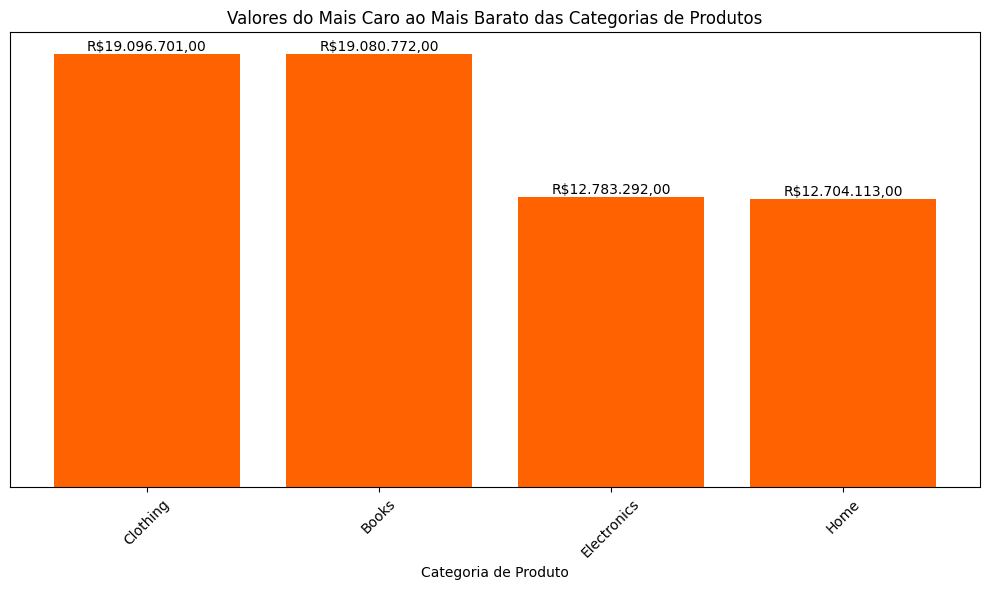

In [5]:
def formatar(valor):
    return f'R${valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

categoriaEpreco = df.groupby(df.columns[2])[df.columns[3]].sum().reset_index()

ordenando_df= categoriaEpreco.sort_values(by=df.columns[3], ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(ordenando_df[df.columns[2]], ordenando_df[df.columns[3]], color='#FF6200')
plt.xlabel('Categoria de Produto')
plt.title('Valores do Mais Caro ao Mais Barato das Categorias de Produtos')

for bar, valor in zip(bars, ordenando_df[df.columns[3]]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), formatar(valor),
             va='bottom', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.gca().yaxis.set_visible(False)
plt.tight_layout()
plt.show()

02) O gráfico acima representa os valores das categorias de produtos, do mais caro ao mais barato, somando os dados de preço do produto em todos os anos. Logo Clothing segue sendo o produto mais caro a certa de todos os anos registrados com 19.096.701,00 e Home com valor mais barato de 12.704.133,00

Em cima das barras temos os valores, no eixo x as categorias correspondentes aos valores.

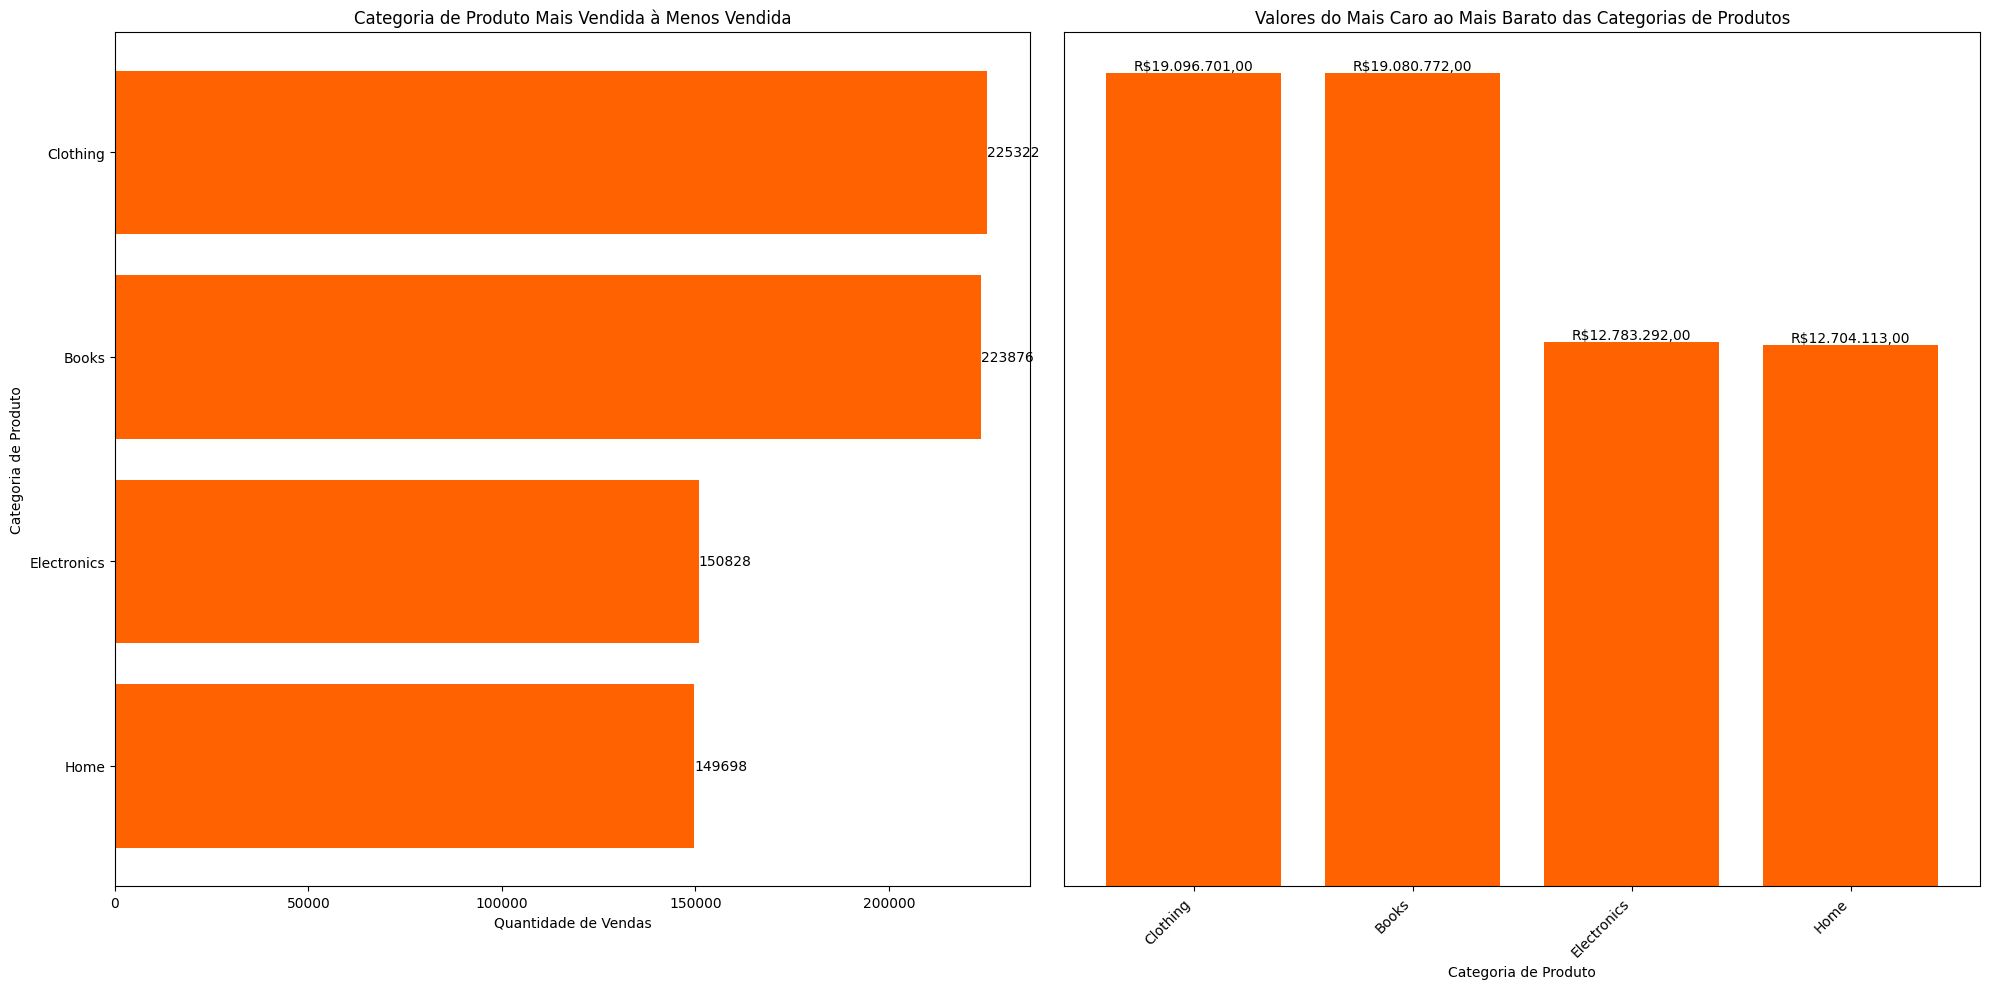

In [6]:
def formatar(valor):
    return f'R${valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

categoriaEqtd= df.groupby(df.columns[2])[df.columns[4]].sum().reset_index()

ordenandoEqtd_df= categoriaEqtd.sort_values(by=df.columns[4], ascending=False)

categoriaEpreco = df.groupby(df.columns[2])[df.columns[3]].sum().reset_index()

ordenandoEpreco_df= categoriaEpreco.sort_values(by=df.columns[3], ascending=False)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

bars1 = axes[0].barh(ordenandoEqtd_df[df.columns[2]], ordenandoEqtd_df[df.columns[4]], color='#FF6200')
axes[0].set_xlabel('Quantidade de Vendas')
axes[0].set_ylabel('Categoria de Produto')
axes[0].set_title('Categoria de Produto Mais Vendida à Menos Vendida')
axes[0].invert_yaxis()


for bar, valor in zip(bars1, ordenandoEqtd_df[df.columns[4]]):
    axes[0].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(valor)}',
                 va='center', ha='left', fontsize=10, color='black')


bars2 = axes[1].bar(ordenandoEpreco_df[df.columns[2]], ordenandoEpreco_df[df.columns[3]], color='#FF6200')
axes[1].set_xlabel('Categoria de Produto')

axes[1].set_title('Valores do Mais Caro ao Mais Barato das Categorias de Produtos')


for bar, valor in zip(bars2, ordenandoEpreco_df[df.columns[3]]):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), formatar(valor),
                 va='bottom', ha='center', fontsize=10, color='black')


axes[1].set_xticks(range(len(ordenandoEpreco_df[df.columns[2]])))
axes[1].set_xticklabels(ordenandoEpreco_df[df.columns[2]], rotation=45, ha='right')
axes[1].yaxis.set_visible(False)

plt.tight_layout()
plt.show()


03) Os gráficos acima representam em sequência:

*   A categoria de produto mais vendida a menos vendida levando em consideração a quantidade de todos os anos. Sendo Clothing a mais vendida com 225322 e Home a menos vendida com 149698.
*   A categoria de produto do valor mais caro ao mais barato, somando todos os anos. Sendo Clothing o produto mais caro a certa de todos os anos registrados com 19.096.701,00 e Home com valor mais barato de 12.704.133,00

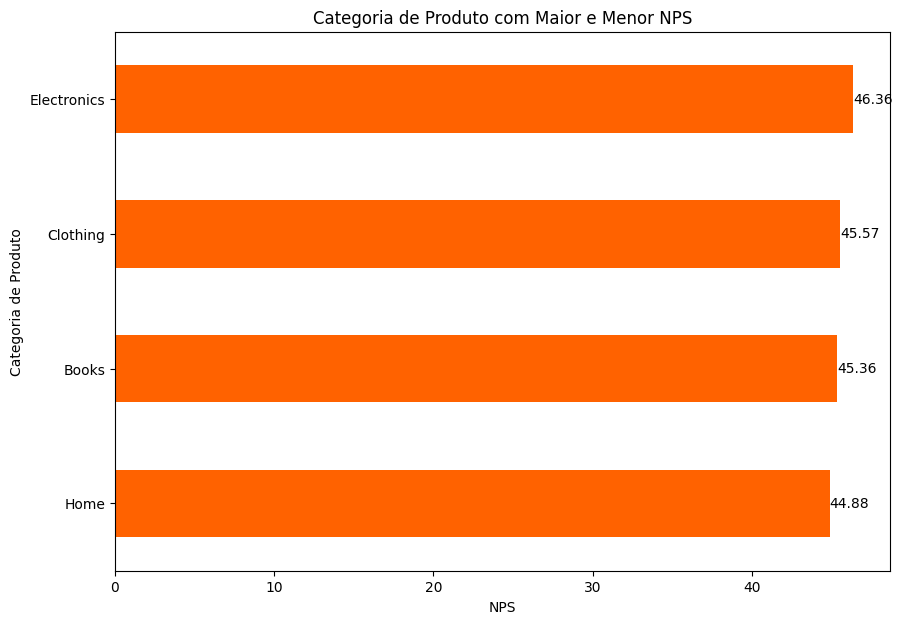

In [7]:
def calcular_nps(df):

    promotor = df[df['NPS'].isin([9, 10])].groupby(df.columns[2])['NPS'].count()

    neutro = df[df['NPS'].isin([7, 8])].groupby(df.columns[2])['NPS'].count()

    detrator = df[df['NPS'].isin(range(0, 7))].groupby(df.columns[2])['NPS'].count()

    total = promotor.add(neutro, fill_value=0).add(detrator, fill_value=0)

    porcentagem_promotores = (promotor/total) * 100

    porcentagem_detratores = (detrator/total) * 100

    nps = porcentagem_promotores - porcentagem_detratores
    return nps
nps_categoria = calcular_nps(df)


plt.figure(figsize=(10, 7))
bars = nps_categoria.sort_values().abs().plot(kind='barh', color='#FF6200')


for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('NPS')
plt.ylabel('Categoria de Produto')
plt.title('Categoria de Produto com Maior e Menor NPS')
plt.gca().invert_yaxis()
plt.show()

04) O grafico de NPS calcula o score por meio da subtração da porcentagem de promotores (clientes satifeitos, leais) e detratores (clientes insatisfeitos), extraida da quantidade total de respostas.   

A categoria Eletronics tem o melhor score de NPS com 46.36 e Home o menor com 44.88

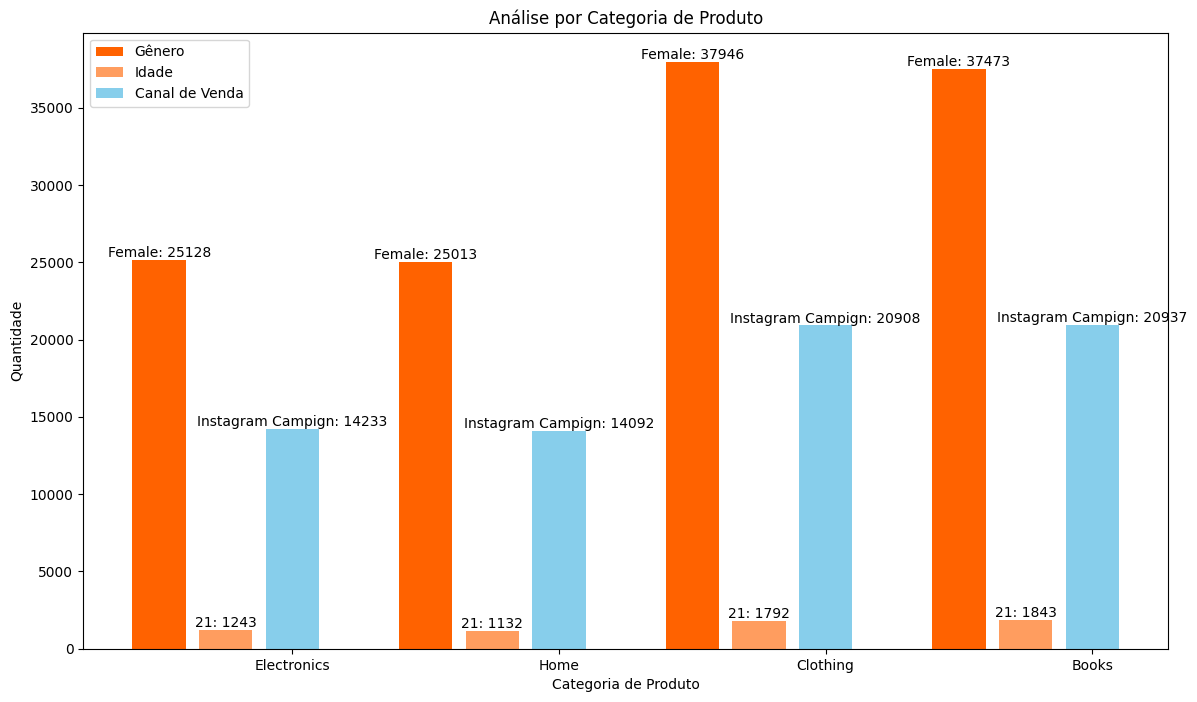

In [8]:
categorias_produto = df.iloc[:, 2].unique()

largura = 0.2
espaco = 0.05
largura_total = (largura + espaco) * len(categorias_produto)

plt.figure(figsize=(14, 8))

for i, categoria in enumerate(categorias_produto):

    genero = df[df.iloc[:, 2] == categoria]
    conta_genero = genero.iloc[:, 8].value_counts()
    genero_mais_compra = conta_genero.idxmax()
    quantidade_genero = conta_genero.max()

    idade = df[df.iloc[:, 2] == categoria]
    conta_idade = idade.iloc[:, 7].value_counts()
    idade_mais_compra = conta_idade.idxmax()
    quantidade_idade = conta_idade.max()


    canal = df[df.iloc[:, 2] == categoria]
    conta_canal = canal.iloc[:, 9].value_counts()
    canal_mais_venda = conta_canal.idxmax() if conta_canal.idxmax() != 'SEM' else conta_canal.index[1]
    quantidade_canal = conta_canal.max()


    barras = [i * (largura_total) + j * (largura + espaco) for j in range(3)]


    plt.bar(barras[0], quantidade_genero, width=largura, color='#ff6200', label='Gênero')
    plt.bar(barras[1], quantidade_idade, width=largura, color='#ff9d5f', label='Idade')
    plt.bar(barras[2], quantidade_canal, width=largura, color='#87CEEB', label='Canal de Venda')

    plt.text(barras[0], quantidade_genero + 0.5, f"{genero_mais_compra}: {quantidade_genero}", ha='center', va='bottom')
    plt.text(barras[1], quantidade_idade + 0.5, f"{idade_mais_compra}: {quantidade_idade}", ha='center', va='bottom')
    plt.text(barras[2], quantidade_canal + 0.5, f"{canal_mais_venda}: {quantidade_canal}", ha='center', va='bottom')

plt.xticks([(largura_total) * i + largura_total / 2 for i in range(len(categorias_produto))], categorias_produto)
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade')
plt.title('Análise por Categoria de Produto')
plt.legend(['Gênero', 'Idade', 'Canal de Venda'], loc='upper left')

plt.show()

05) Neste gráfico acima temos a representação dos gêneros, idades e canais de vendas que mais vendem cada categoria de produto.

Separei apenas o maior de cada categoria de produto sendo gênero feminino o maior público de vendas de todas as categorias assim como a idade aos 21 anos é predominante e o melhor canal de venda o Instagram.
